In [1]:
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles, 
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)

from samalg import SAM
import pandas as pd

#from samap.mapping import SAMAP
#from samap.analysis import get_mapping_scores, GenePairFinder
#from samalg import SAM
from samap.utils import save_samap, load_samap
import pandas as pd
import csv
import scanpy as sc
import numpy as np
import scrabbit
import os

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/SAMap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sc.set_figure_params(dpi_save=600)
sc.settings.figdir = "/groups/tanaka/People/current/jiwang/projects/heart_regeneration/results/cross_species_20240220/samap_out/"
save_dir = "/groups/tanaka/People/current/jiwang/projects/heart_regeneration/results/cross_species_20240220/samap_out/"
data_dir = "/groups/tanaka/People/current/jiwang/src/samap_directory/example_data/"

In [8]:
A=pd.read_csv(os.path.join(data_dir, 'maps/plsc/pl_to_sc.txt'),sep='\t',index_col=0,header=None)
B=pd.read_csv(os.path.join(data_dir, 'maps/plsc/sc_to_pl.txt'),sep='\t',index_col=0,header=None)
A.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
dd_Smed_v4_10001_0_1,Smp_042920,30.594,219,144,4,167,814,13,226,4.210000e-30,112.0
dd_Smed_v4_10002_0_1,Smp_131400,30.709,127,79,4,190,555,328,450,3.400000e-11,62.4
dd_Smed_v4_10003_0_1,Smp_327560,41.079,241,126,5,112,798,22,258,1.610000e-43,162.0
dd_Smed_v4_10003_0_1,Smp_172110,36.567,134,72,5,109,474,147,279,1.080000e-17,84.3
dd_Smed_v4_10003_0_1,Smp_056760,30.075,133,90,2,163,555,44,175,1.140000e-13,72.4


In [9]:
B.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
Smp_000040,dd_Smed_v4_8806_0_1,59.426,488,187,6,17,502,45,1481,1.030000e-163,478.0
Smp_000040,dd_Smed_v4_8136_0_1,51.883,478,213,5,20,497,25,1407,1.780000e-134,417.0
Smp_000040,dd_Smed_v4_6575_0_1,53.396,427,187,4,74,493,238,1503,6.790000e-114,353.0
Smp_000040,dd_Smed_v4_6449_0_1,49.727,366,161,5,91,435,239,1330,9.440000e-90,292.0
Smp_000040,dd_Smed_v4_6239_0_1,37.403,516,280,8,19,495,80,1615,1.120000e-84,276.0


In [3]:
#from samalg import SAM #import SAM
sam=SAM() #initialize SAM object

In [ ]:
sam.load_data('/path/to/h5ad_file.h5ad') #load data from a h5ad file
sam.preprocess_data() # log transforms and filters the data
sam.run()
sam.scatter()

In [10]:
fn1 = os.path.join(data_dir, 'planarian.h5ad')
fn2 = os.path.join(data_dir, 'schistosome.h5ad')
fn3 = os.path.join(data_dir, 'hydra.h5ad')

In [11]:
filenames = {'pl':fn1,'sc':fn2,'hy':fn3}

In [12]:
sam1=SAM()
sam1.load_data(fn1)

sam2=SAM()
sam2.load_data(fn2)

sam3=SAM()
sam3.load_data(fn3)

In [14]:
sam1

In [13]:
# The BLAST alignment step of the SAMap pipeline was performed using CDS sequences with transcript annotations. 
# Here we relate the Ensembl transcript IDs with gene IDs present in the anndata object. This is provided to SAMAP in the names parameter.
# Mouse
#m_ensembl = pd.read_csv("data-in/m_transcript_data.tsv",sep="\t")
#m_genes = pd.read_csv("data-in/m_genes.tsv",sep="\t")
#m_names = [(y,x) for x in m_genes["x"] for y in m_ensembl.loc[m_ensembl["ensembl_gene_id"]==x,"ensembl_transcript_id_version"]]
#sm = SAMAP(r_sam, m_sam, "ra", "mo", f_maps=base_path + "integration/SAMap/maps/", names1=r_names, names2=mext_names, save_processed=False)

sams = {'pl':sam1,'sc':sam2,'hy':sam3}
sm = SAMAP(
        sams,
        f_maps = os.path.join(data_dir, 'maps/'),
    )


Not updating the manifold...
Not updating the manifold...
Not updating the manifold...
14355 `pl` gene symbols match between the datasets and the BLAST graph.
7605 `sc` gene symbols match between the datasets and the BLAST graph.
12637 `hy` gene symbols match between the datasets and the BLAST graph.


In [15]:
sm.run(pairwise=True)
samap = sm.samap # SAM object with three species stitched together
#sm_out = sm.run()

Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 5.633130788803101
Correcting data with means. 8.205063819885254
Expanding neighbourhoods of species pl...
Expanding neighbourhoods of species sc...
Expanding neighbourhoods of species hy...
Indegree coarsening
0/1 (0, 3124)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 1 complete.
Alignment scores:
          hy        pl        sc
hy  0.000000  0.391866  0.383083
pl  0.445964  0.000000  0.601843
sc  0.455304  0.639204  0.000000
Calculating gene-gene correlations in the homology graph...
Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 5.228547096252441
Correcting data with means. 7.658292770385742
Expanding neighbourhoods of species pl...
Expanding neighbourhoods of species sc...
Expanding neighbourhoods of species hy...
Indegree coarsening
0/1 (0, 3124)
Rescaling edge

In [16]:
sm.sams['pl'].adata.obs['cluster'].head()

index
Cells_Trunk_TGAGCAGGTATT    Intestine: 6
Cells_Trunk_CTCGAACCAAAG    Intestine: 6
Cells_Trunk_ATCTAGTCGACN     Neoblast: 0
Cells_Trunk_CTTTGAAAATCT    Epidermal: 2
Cells_Trunk_CCTTTTAGAACT     Neoblast: 0
Name: cluster, dtype: category
Categories (42, object): ['Cathepsin+ cells: 4', 'Cathepsin+ cells: 10', 'Cathepsin+ cells: 15', 'Cathepsin+ cells: 17', ..., 'Pharynx: 37', 'Protonephridia: 26', 'Protonephridia: 29', 'Protonephridia: 40']

In [17]:
sm.sams['pl'].adata

AnnData object with n_obs × n_vars = 1049 × 25937
    obs: 'tissue', 'subcluster', 'cluster', 'leiden_clusters', 'tissue_smedwi'
    var: 'mask_genes', 'means', 'variances', 'weights', 'spatial_dispersions', 'mean_correction'
    uns: 'path_to_file', 'preprocess_args', 'ranked_genes', 'run_args', 'dimred_indices'
    obsm: 'X_pca', 'X_umap', 'X_processed', 'X_umap_samap'
    varm: 'PCs', 'PCs_SAMap'
    layers: 'X_disp'
    obsp: 'connectivities', 'distances', 'nnm'

In [19]:
print(sm.sams['pl'].adata.var_names[:10])

Index(['pl_dd_Smed_v4_10001_0_1', 'pl_dd_Smed_v4_100026_0_1',
       'pl_dd_Smed_v4_10002_0_1', 'pl_dd_Smed_v4_100037_0_1',
       'pl_dd_Smed_v4_10003_0_1', 'pl_dd_Smed_v4_100044_0_1',
       'pl_dd_Smed_v4_100048_0_1', 'pl_dd_Smed_v4_10004_0_1',
       'pl_dd_Smed_v4_10005_0_1', 'pl_dd_Smed_v4_100062_0_1'],
      dtype='object')


In [20]:
sm.sams['hy'].adata.obs['Cluster'].head()

index
03-MA_GCTAAAGCCACN    i_mgl
03-MA_CCCTATCCTGGG    i_mgl
03-MA_TGCAGTCCTGCC    i_mgl
03-MA_GCCCTGAAACCA    i_mgl
03-FM_AGGTTGGTCTTA    i_mgl
Name: Cluster, dtype: category
Categories (42, object): ['ecEp_SC2', 'ecEp_SC3', 'ecEp_bat1(mp)', 'ecEp_bat2(mp)', ..., 'i_smgc2', 'i_zmg1', 'i_zmg2', 'nan']

In [21]:
sm.sams['sc'].adata.obs['tissue'].head()

index
YX_1009901001_B20       Muscle
YX_1009901001_B4     Cathepsin
YX_1009901001_C23     Neoblast
YX_1009901001_C8        Neural
YX_1009901001_D2        Muscle
Name: tissue, dtype: category
Categories (11, object): ['Cathepsin', 'Flame cells', 'Gland', 'Intestine', ..., 'Neural_KK7', 'Parenchymal', 'Tegument', 'Tegument_prog']

In [25]:
sm.sams['sc'].adata

AnnData object with n_obs × n_vars = 1071 × 10162
    obs: 'leiden_clusters', 'tissue', 'cluster_t', 'cluster_uncertainty'
    var: 'mask_genes', 'means', 'variances', 'weights', 'spatial_dispersions', 'mean_correction'
    uns: 'path_to_file', 'preprocess_args', 'ranked_genes', 'run_args', 'dimred_indices'
    obsm: 'X_pca', 'X_umap', 'X_processed', 'X_umap_samap'
    varm: 'PCs', 'PCs_SAMap'
    layers: 'X_disp'
    obsp: 'connectivities', 'distances', 'nnm'

In [ ]:
# Export results
#save_samap(sm, "data-out/rm_sm_out.samap")
#save_samap(sm_out,"data-out/rm_sm_out.samap")
#sm_out.adata.write("data-out/rm_sm_out.h5ad")

In [28]:
sm_out = sm.samap

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


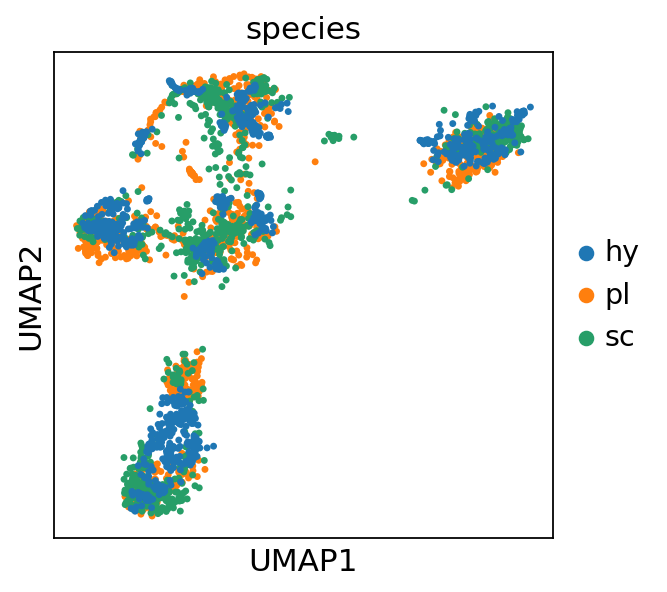

In [29]:
sc.pl.umap(sm_out.adata,color=["species"], save="_samap_species.pdf")
#samap.adata.obs['species']

In [30]:
#Recompute UMAP
sc.pp.neighbors(sm_out.adata, n_neighbors=50)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/SAMap/lib/python3.9/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [31]:
sc.tl.umap(sm_out.adata,min_dist=0.5)

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


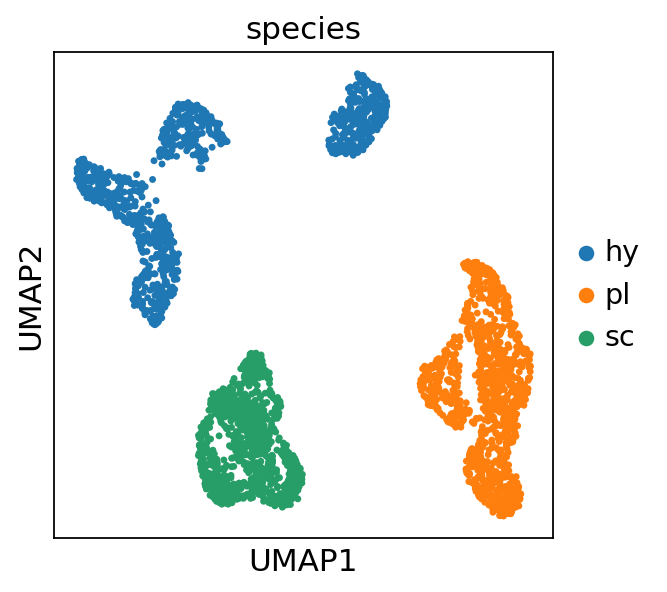

In [32]:
sc.pl.umap(sm_out.adata,color=["species"],save="_samap_species_min_dist_05.pdf")

In [ ]:
# Querying gene mapping scores

In [33]:
sm.query_gene_pairs('pl_dd_Smed_v4_659_0_1')

{'blast': sc_Smp_102690    116.0
 sc_Smp_179320    130.0
 sc_Smp_198380    110.0
 hy_t34367aep      73.5
 hy_t13960aep      70.3
 dtype: float64,
 'correlation': sc_Smp_102690    0.219418
 sc_Smp_179320    0.872312
 sc_Smp_198380    0.270671
 hy_t34367aep     0.655387
 hy_t13960aep     0.601781
 dtype: float64}

In [34]:
sm.query_gene_pair('pl_dd_Smed_v4_659_0_1','Smp_179320')

{'blast': 130.0, 'correlation': 0.8723122797541265}

In [35]:
keys = {'pl':'cluster','hy':'Cluster','sc':'tissue'}
D,MappingTable = get_mapping_scores(sm,keys,n_top = 0)

In [36]:
D.head()

sc_Muscle                                 hy_i_nc3                  \
    Cluster Alignment score                  Cluster Alignment score   
0  hy_i_nc3        0.000349                sc_Muscle        0.000349   
1  hy_i_nc7        0.000338  pl_Cathepsin+ cells: 10             0.0   
2  hy_i_nc2        0.000309         hy_ecEp_nem2(id)             0.0   
3  hy_i_nc6        0.000275         hy_enEp_tent(pd)             0.0   
4  hy_i_nb4         0.00027             hy_enEp_tent             0.0   

                  hy_i_nc7                                 hy_i_nc2  \
                   Cluster Alignment score                  Cluster   
0                sc_Muscle        0.000338                sc_Muscle   
1  pl_Cathepsin+ cells: 10             0.0  pl_Cathepsin+ cells: 10   
2         hy_ecEp_nem2(id)             0.0         hy_ecEp_nem2(id)   
3         hy_enEp_tent(pd)             0.0         hy_enEp_tent(pd)   
4             hy_enEp_tent             0.0             hy_enEp_tent   

                                  hy_i_nc6                  ...  \
  Alignment score                  Cluster Alignment score  ...   
0        0.000309                sc_Muscle        0.000275  ...   
1             0.0  pl_Cathepsin+ cells: 10             0.0  ...   
2             0.0         hy_ecEp_nem2(id)             0.0  ...   
3             0.0         hy_enEp_tent(pd)             0.0  ...   
4             0.0             hy_enEp_tent             0.0  ...   

             pl_Neural: 21                            pl_Neural: 20  \
                   Cluster Alignment score                  Cluster   
0  pl_Cathepsin+ cells: 10             0.0  pl_Cathepsin+ cells: 10   
1         hy_ecEp_nem2(id)             0.0         hy_ecEp_nem2(id)   
2         hy_enEp_tent(pd)             0.0         hy_enEp_tent(pd)   
3             hy_enEp_tent             0.0             hy_enEp_tent   
4         hy_enEp_nem2(pd)             0.0         hy_enEp_nem2(pd)   

                             pl_Neural: 18                  \
  Alignment score                  Cluster Alignment score   
0             0.0  pl_Cathepsin+ cells: 10             0.0   
1             0.0         hy_ecEp_nem2(id)             0.0   
2             0.0         hy_enEp_tent(pd)             0.0   
3             0.0             hy_enEp_tent             0.0   
4             0.0         hy_enEp_nem2(pd)             0.0   

            pl_Neoblast: 5                                   hy_nan  \
                   Cluster Alignment score                  Cluster   
0  pl_Cathepsin+ cells: 10             0.0  pl_Cathepsin+ cells: 10   
1         hy_ecEp_nem2(id)             0.0         hy_ecEp_nem2(id)   
2         hy_enEp_tent(pd)             0.0         hy_enEp_tent(pd)   
3             hy_enEp_tent             0.0             hy_enEp_tent   
4         hy_enEp_nem2(pd)             0.0         hy_enEp_nem2(pd)   

                   
  Alignment score  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 190 columns]

In [37]:
MappingTable.head()

,pl_Cathepsin+ cells: 10,pl_Cathepsin+ cells: 15,pl_Cathepsin+ cells: 17,pl_Cathepsin+ cells: 28,pl_Cathepsin+ cells: 31,pl_Cathepsin+ cells: 39,pl_Cathepsin+ cells: 4,pl_Cathepsin+ cells: 41,pl_Epidermal: 11,pl_Epidermal: 2,...,hy_i_nc7,hy_i_nc8,hy_i_nc_gc_prog,hy_i_nc_prog,hy_i_nem,hy_i_smgc1,hy_i_smgc2,hy_i_zmg1,hy_i_zmg2,hy_nan
pl_Cathepsin+ cells: 10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pl_Cathepsin+ cells: 15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pl_Cathepsin+ cells: 17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pl_Cathepsin+ cells: 28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pl_Cathepsin+ cells: 31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Visualizing mapping scores
sankey_plot(MappingTable, align_thr=0.05, species_order = ['pl','sc'])

ImportError: Please install holoviews-samap with `!pip install holoviews-samap`.

In [39]:
sankey_plot(MappingTable, align_thr=0.05, species_order = ['sc','pl','hy'])

ValueError: Shape of passed values is (0, 0), indices imply (0, 2)

In [42]:
chord_plot(MappingTable, align_thr=0.05)

ImportError: Please install holoviews-samap with `!pip install holoviews-samap`.

<Axes: >

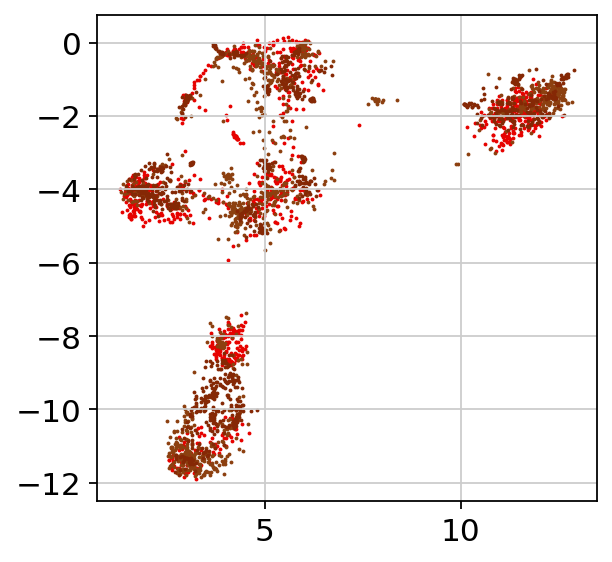

In [43]:
sm.scatter()

In [44]:
gpf = GenePairFinder(sm,keys=keys)

Finding cluster-specific markers in pl:cluster.
Finding cluster-specific markers in sc:tissue.
Finding cluster-specific markers in hy:Cluster.


In [45]:
n1 = 'pl_Neoblast: 0' #cell type ID from organism 1 (must be present in `sam1.adata.obs[k1]`)
n2 = 'sc_Neoblast' #cell type ID from organism 2 (must be present in `sam2.adata.obs[k1]`)
Gp,G1,G2,pvals1,pvals2 = gpf.find_genes(n1,n2)
#Gp are the gene pairs, G1 are the genes from organism 1, G2 are the genes from organism 2,
#pvals1 are p-values from organism 1, and pvals2 are p-values from organism 2.


ZeroDivisionError: float division by zero

In [47]:
Gp[:5],G1[:5],G2[:5],pvals1[:5],pvals2[:5]

NameError: name 'Gp' is not defined

In [48]:
gene_pairs = gpf.find_all(align_thr=0.2)

IndexError: arrays used as indices must be of integer (or boolean) type

In [49]:
gene_pairs.head()

NameError: name 'gene_pairs' is not defined

In [50]:
gene_pairs = gpf.find_all(n='sc_Muscle', align_thr=0.2)


In [51]:
gene_pairs.head()

""
